# Image Classifier

## 1.Building a data pipeline

extension to download data easily: https://chromewebstore.google.com/detail/download-all-images/ifipmflagepipjokmbdecpmjbibjnakm?utm_source=ext_app_menu

- click extension to download the images
- rename the zip files accordingly
- Click extrct to filename\ and 
- move extracted folders into a folder called data

### 1.1 Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)

  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\admin\\AppData\\Local\\Temp\\pip-install-crhuu81z\\tensorflow-gpu_a6a115b32fa348abbd796a8846724654\\setup.py'"'"'; __file__='"'"'C:\\Users\\admin\\AppData\\Local\\Temp\\pip-install-crhuu81z\\tensorflow-gpu_a6a115b32fa348abbd796a8846724654\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\admin\AppData\Local\Temp\pip-wheel-_ddb5zsb'
       cwd: C:\Users\admin\AppData\Local\Temp\pip-install-crhuu81z\tensorflow-gpu_a6a115b32fa348abbd796a8846724654\
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\admin\AppData\Local\Temp\pip-install-crhuu81z\tensorflow-gpu_a6a115b32fa348abbd796a8846724654\setup.py


  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
    Running setup.py install for tensorflow-gpu: started
    Running setup.py install for tensorflow-gpu: finished with status 'error'


In [2]:
pip list

Package                            Version
---------------------------------- -------------------
-                                  mpy
-.mpy                              1.24.3
-0mpy                              1.24.3
-mpy                               1.24.3
-umpy                              1.24.3
absl-py                            2.0.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5

In [3]:
import tensorflow as tf
import os #navigate file struct

os.path.join('data','happy')

os.listdir("data")

In [4]:
# to avaoid OOM errors by setting GPU Mem Constraint Growth
gpus = tf.config.experimental.list_physical_devices('GPU') #returns availabe gpu
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True) # limiting mem usage
gpus    

[]

## 2. Remove Dodgy Images
mis extended/corruptes -- handle

In [5]:
import cv2
import imghdr
import matplotlib.pyplot as plt

In [26]:
data_dir = r"data"
data_dir

'data'

In [27]:
os.listdir(data_dir)

['happy', 'sad']

In [28]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '10-Habits-of-Happy-People-Seniors-Today.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '163-1635094_happiness-love-clip-art-happy-people-transparent-background.png',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '2560px-Happy_People.jpg',
 '3BCckliche-menschen-konzept-gruppe-von-jugendlichen-auf-der-suche-nach-unten.jpg',
 '56f455011e0000b300705475.jpeg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '71hBPTAhIXL.jpg',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 '960x0.jpg',
 'A_Sep20_14_1189155141.jpg',
 'blog_image_20180219221810890.jpg',
 'compassion-900x387.jpg',
 'crowd-of-happy-people-poster-vector-20970718.jpg',
 'Dollarphotoclub

delete files below 10 kb

In [29]:
img_exts=['jpg','jpeg','png','bmp']

In [66]:
img = cv2.imread(os.path.join(data_dir,'happy','154006829.jpg'))

In [31]:
img.shape

(3744, 5616, 3)

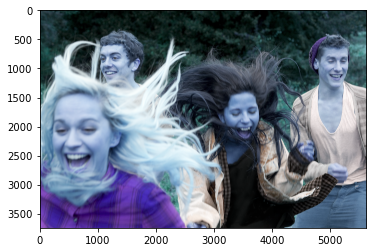

In [32]:
plt.imshow(img)

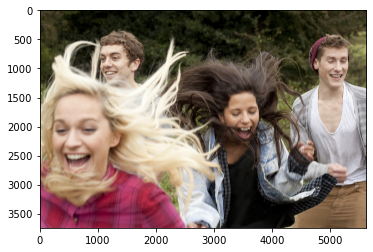

In [33]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [40]:
import os
import cv2
import imghdr

data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'png', 'bmp']  # List of supported image extensions

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            if not os.path.isfile(image_path):
                print('File not found: {}'.format(image_path))
                continue  # Skip to next iteration if file not found

            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list: {}'.format(image_path))
                os.remove(image_path)
                print('Deleted: {}'.format(image_path))
        except Exception as e:
            print('Error processing image {}: {}'.format(image_path, str(e)))


Image not in ext list: data\happy\2560px-Happy_People.jpg
Deleted: data\happy\2560px-Happy_People.jpg
Image not in ext list: data\happy\3BCckliche-menschen-konzept-gruppe-von-jugendlichen-auf-der-suche-nach-unten.jpg
Deleted: data\happy\3BCckliche-menschen-konzept-gruppe-von-jugendlichen-auf-der-suche-nach-unten.jpg
Image not in ext list: data\happy\56f455011e0000b300705475.jpeg
Deleted: data\happy\56f455011e0000b300705475.jpeg
Image not in ext list: data\happy\group-happy-people-isolated-over-600w-102307264.jpg
Deleted: data\happy\group-happy-people-isolated-over-600w-102307264.jpg
Image not in ext list: data\happy\guilherme-stecanella-375176-unsplash.jpg
Deleted: data\happy\guilherme-stecanella-375176-unsplash.jpg
Image not in ext list: data\happy\happy-people-having-fun-over-260nw-611293913.jpg
Deleted: data\happy\happy-people-having-fun-over-260nw-611293913.jpg
Image not in ext list: data\happy\Happy20People.jpg
Deleted: data\happy\Happy20People.jpg
Image not in ext list: data\happ

## 3. Load Data

In [17]:
tf.data.Dataset??

In [41]:
import numpy as np

In [42]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 148 files belonging to 2 classes.


In [43]:
data_iterator = data.as_numpy_iterator()

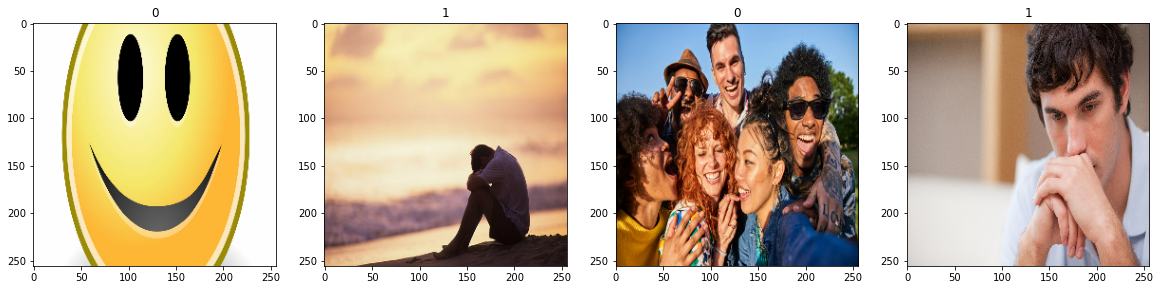

In [44]:
import matplotlib.pyplot as plt

data_iterator = data.as_numpy_iterator()
batch = next(data_iterator)

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].set_title(str(batch[1][idx]))  # Convert to string before setting title

plt.show()


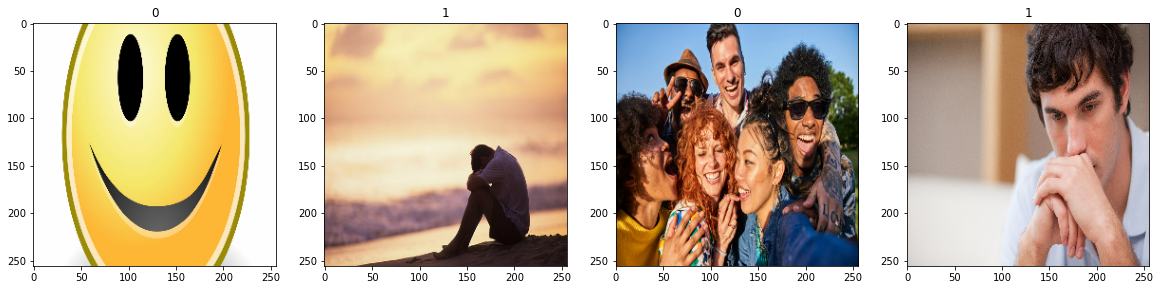

In [45]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 4. Scale images

In [46]:
data = data.map(lambda x,y: (x/255, y))

In [47]:
data.as_numpy_iterator().next()

(array([[[[2.93259799e-01, 3.29442412e-01, 1.93198532e-01],
          [2.68102795e-01, 3.07318479e-01, 1.73985139e-01],
          [2.25091904e-01, 2.79013485e-01, 1.68956801e-01],
          ...,
          [3.24525125e-02, 9.12760422e-02, 7.95113370e-02],
          [1.37254903e-02, 7.19324425e-02, 6.01677373e-02],
          [2.88909320e-02, 7.20281899e-02, 5.05208336e-02]],
 
         [[3.16517323e-01, 3.40046734e-01, 2.06713393e-01],
          [2.75712311e-01, 3.14927995e-01, 1.81594670e-01],
          [2.40150124e-01, 2.92333037e-01, 1.80947453e-01],
          ...,
          [5.79810049e-03, 6.46216273e-02, 5.28569259e-02],
          [1.01945465e-02, 6.90180734e-02, 5.72533719e-02],
          [1.56862754e-02, 6.27451017e-02, 5.49019612e-02]],
 
         [[2.97242641e-01, 3.20772052e-01, 1.79595590e-01],
          [2.52745867e-01, 2.95534611e-01, 1.62201285e-01],
          [2.43815109e-01, 3.04599404e-01, 1.82540596e-01],
          ...,
          [3.48498783e-04, 5.27994782e-02, 4.1034

## 5.Split Data

In [48]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [49]:
train_size

3

In [50]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Creating a Deep NN Classifier

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [52]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [53]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## 7. Train

In [55]:
logdir='logs'

In [56]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [57]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 7s 2s/step - loss: 0.9222 - accuracy: 0.5104 - val_loss: 0.9161 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 5s 1s/step - loss: 0.6790 - accuracy: 0.6562 - val_loss: 0.6739 - val_accuracy: 0.5938
Epoch 3/20
3/3 [==============================] - 5s 1s/step - loss: 0.6114 - accuracy: 0.7083 - val_loss: 0.5546 - val_accuracy: 0.6250
Epoch 4/20
3/3 [==============================] - 5s 1s/step - loss: 0.5749 - accuracy: 0.6354 - val_loss: 0.5038 - val_accuracy: 0.9062
Epoch 5/20
3/3 [==============================] - 5s 1s/step - loss: 0.5862 - accuracy: 0.6458 - val_loss: 0.4882 - val_accuracy: 0.8125
Epoch 6/20
3/3 [==============================] - 5s 1s/step - loss: 0.4967 - accuracy: 0.7396 - val_loss: 0.5512 - val_accuracy: 0.6562
Epoch 7/20
3/3 [==============================] - 5s 1s/step - loss: 0.4652 - accuracy: 0.7812 - val_loss: 0.4835 - val_accuracy: 0.8125
Epoch 8/20
3/3 [=========================

## 8.Plot Performance

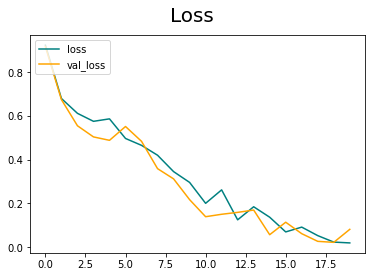

In [59]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

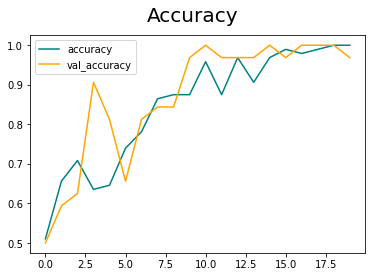

In [60]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 9. Evaluating Model Performance

In [77]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [78]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [79]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [80]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


## 10.Testing

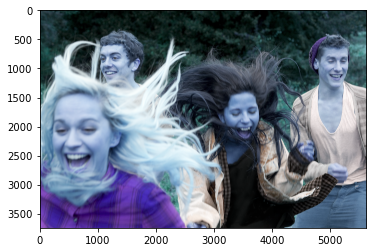

In [67]:
plt.imshow(img)
plt.show()

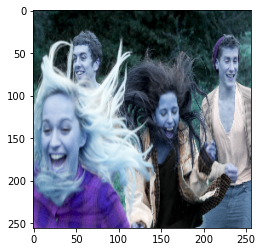

In [68]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [69]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 132ms/step


In [70]:
yhat

array([[0.66302055]], dtype=float32)

In [71]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


## 11. Saving for Model Deployment

In [73]:
from tensorflow.keras.models import load_model

In [74]:
model.save(os.path.join('models','imageclassifier.h5'))

In [75]:
new_model = load_model('imageclassifier.h5')

OSError: No file or directory found at imageclassifier.h5

In [76]:
new_model.predict(np.expand_dims(resize/255, 0))
array([[0.01972741]], dtype=float32)

NameError: name 'new_model' is not defined